# Taxonomic Analysis 
This notebook contains all the taxonomic analysis performed after obtaining the data and selected the samples


## Libraries import and data reading

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tax = pd.read_csv('drive/MyDrive/Bioscienze/Progetto/Data/99_otu_taxonomy.txt', sep='\t', header=None, dtype={'id':'str'})
otus = pd.read_csv('drive/MyDrive/Bioscienze/Progetto/Data/otu_match.tsv', sep='\t', index_col=0)
meta = pd.read_csv('drive/MyDrive/Bioscienze/Progetto/Data/sample_metadata.tsv', sep='\t').rename(columns={'sample-id': 'id'})

In [ ]:
tax = tax.rename(columns={0:"id", 1:"bacteria"})
tax.id = tax.id.astype(str)
tax.head(5)

,id,bacteria
0,228054,k__Bacteria; p__Cyanobacteria; c__Synechococco...
1,228057,k__Bacteria; p__Proteobacteria; c__Alphaproteo...
2,73627,k__Bacteria; p__Actinobacteria; c__Actinobacte...
3,378462,k__Bacteria; p__Firmicutes; c__Bacilli; o__Bac...
4,89370,k__Bacteria; p__Firmicutes; c__Bacilli; o__Bac...


In [ ]:
meta

,id,sex,age_cat,refined_sugars
0,10317.000001166.25853,female,40s,No
1,10317.000003100.69016,female,40s,No
2,10317.000004936.25853,male,50s,No
3,10317.000010862.25853,male,20s,No
4,10317.000012018.56079,female,50s,No
...,...,...,...,...
354,10317.000109791.74729,male,20s,Yes
355,10317.000109807.76952,female,40s,Yes
356,10317.000110177.74729,male,30s,Yes
357,10317.000112912.76952,female,50s,Yes


In [ ]:
otus

,2941399,4425663,353737,363646,1090458,922239,845273,185021,293665,4453060,...,213762,179905,4324040,333726,199147,1808779,173916,435264,325586,4307347
10317.000001166.25853,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000003100.69016,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000004936.25853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000010862.25853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000012018.56079,0.0,64.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10317.000109791.74729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000109807.76952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000110177.74729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000112912.76952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
otus_t = otus.T.reset_index().rename(columns={'index':'id'})

In [ ]:
otus_t

,id,10317.000001166.25853,10317.000003100.69016,10317.000004936.25853,10317.000010862.25853,10317.000012018.56079,10317.000013727.69016,10317.000014885.41931,10317.000017272.30606,10317.000020655.26478,...,10317.000108496.74729,10317.000108903.74729,10317.000108906.74729,10317.000109022.74729,10317.000109095.74729,10317.000109791.74729,10317.000109807.76952,10317.000110177.74729,10317.000112912.76952,10317.000113026.81168
0,2941399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4425663,1.0,1.0,0.0,0.0,64.0,0.0,0.0,0.0,2.0,...,3.0,0.0,4.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0
2,353737,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,363646,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1090458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6899,1808779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6900,173916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6901,435264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6902,325586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
otus_tax = pd.merge(otus_t, tax, on='id')

In [ ]:
otus_tax

,id,10317.000001166.25853,10317.000003100.69016,10317.000004936.25853,10317.000010862.25853,10317.000012018.56079,10317.000013727.69016,10317.000014885.41931,10317.000017272.30606,10317.000020655.26478,...,10317.000108903.74729,10317.000108906.74729,10317.000109022.74729,10317.000109095.74729,10317.000109791.74729,10317.000109807.76952,10317.000110177.74729,10317.000112912.76952,10317.000113026.81168,bacteria
0,2941399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Synergistetes; c__Synergistia;...
1,4425663,1.0,1.0,0.0,0.0,64.0,0.0,0.0,0.0,2.0,...,0.0,4.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Firmicutes; c__Clostridia; o__...
2,353737,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Firmicutes; c__Clostridia; o__...
3,363646,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Firmicutes; c__Clostridia; o__...
4,1090458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Firmicutes; c__Clostridia; o__...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6899,1808779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Actinobacteria; c__Actinobacte...
6900,173916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Firmicutes; c__Clostridia; o__...
6901,435264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...
6902,325586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Firmicutes; c__Clostridia; o__...


Lets now split the taxonomy in different features, one for each taxonomy level:

In [ ]:
def split_tax(s):
  t = s.split(';')
  return t

In [ ]:
res = otus_tax['bacteria'].apply(split_tax)

In [ ]:
taxa_filt = pd.DataFrame(res.to_list(),columns=['kingdom','phylum','class','order','family','genus','species']) 

In [ ]:
taxa_filt

,kingdom,phylum,class,order,family,genus,species
0,k__Bacteria,p__Synergistetes,c__Synergistia,o__Synergistales,f__Synergistaceae,g__Synergistes,s__
1,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__,g__,s__
2,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Ruminococcaceae,g__Ruminococcus,s__
3,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Ruminococcaceae,g__Ruminococcus,s__
4,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__[Tissierellaceae],g__Anaerococcus,s__
...,...,...,...,...,...,...,...
6899,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Actinomycetales,f__Nocardioidaceae,g__,s__
6900,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__,g__,s__
6901,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Porphyromonadaceae,g__Porphyromonas,s__
6902,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,g__,s__


Some indications on how diverse the taxonomy is:

In [ ]:
taxa_filt.kingdom.value_counts()/6904

k__Bacteria    0.998552
k__Archaea     0.001448
Name: kingdom, dtype: float64

In [ ]:
taxa_filt.phylum.value_counts()/6904

 p__Firmicutes          0.661501
 p__Proteobacteria      0.142092
 p__Bacteroidetes       0.116309
 p__Actinobacteria      0.049247
 p__Tenericutes         0.009994
 p__Cyanobacteria       0.005504
 p__Fusobacteria        0.004200
 p__Verrucomicrobia     0.002028
 p__[Thermi]            0.001304
 p__Lentisphaerae       0.001304
 p__Euryarchaeota       0.001304
 p__Synergistetes       0.001014
 p__Spirochaetes        0.000869
 p__TM7                 0.000579
 p__Chloroflexi         0.000579
 p__Acidobacteria       0.000579
 p__WPS-2               0.000290
 p__Deferribacteres     0.000290
 p__SR1                 0.000290
 p__Planctomycetes      0.000290
 p__Nitrospirae         0.000145
 p__Crenarchaeota       0.000145
 p__Gemmatimonadetes    0.000145
Name: phylum, dtype: float64

In [ ]:
taxa_filt["class"].value_counts()/6904

 c__Clostridia               0.566338
 c__Bacteroidia              0.104577
 c__Bacilli                  0.083140
 c__Gammaproteobacteria      0.075319
 c__Actinobacteria           0.035921
 c__Betaproteobacteria       0.035197
 c__Alphaproteobacteria      0.025203
 c__Erysipelotrichi          0.012022
 c__Coriobacteriia           0.011877
 c__Mollicutes               0.009705
 c__Flavobacteriia           0.006952
 c__Fusobacteriia            0.004200
 c__Deltaproteobacteria      0.004056
 c__4C0d-2                   0.003187
 c__Sphingobacteriia         0.002462
 c__Epsilonproteobacteria    0.002317
 c__Chloroplast              0.001883
 c__Verrucomicrobiae         0.001593
 c__[Saprospirae]            0.001448
 c__[Lentisphaeria]          0.001304
 c__Deinococci               0.001304
 c__Synergistia              0.001014
 c__Methanobacteria          0.000869
 c__Spirochaetes             0.000869
 c__Cytophagia               0.000869
 c__Thermoleophilia          0.000724
 c__        

In [ ]:
taxa_filt["order"].value_counts().loc[" o__"]/6904

0.0028968713789107765

In [ ]:
taxa_filt["genus"].value_counts().loc[" g__"]/6904

0.5118771726535342

In [ ]:
taxa_filt["species"].value_counts().loc[" s__"]/6904

0.897305909617613

Integration of the splitted taxonomy in the dataframe:

In [ ]:
otus_tax_s = pd.concat([otus_t,taxa_filt],axis = 1)

In [ ]:
otus_tax_s

,id,10317.000001166.25853,10317.000003100.69016,10317.000004936.25853,10317.000010862.25853,10317.000012018.56079,10317.000013727.69016,10317.000014885.41931,10317.000017272.30606,10317.000020655.26478,...,10317.000110177.74729,10317.000112912.76952,10317.000113026.81168,kingdom,phylum,class,order,family,genus,species
0,2941399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,k__Bacteria,p__Synergistetes,c__Synergistia,o__Synergistales,f__Synergistaceae,g__Synergistes,s__
1,4425663,1.0,1.0,0.0,0.0,64.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__,g__,s__
2,353737,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Ruminococcaceae,g__Ruminococcus,s__
3,363646,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,...,0.0,0.0,0.0,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Ruminococcaceae,g__Ruminococcus,s__
4,1090458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__[Tissierellaceae],g__Anaerococcus,s__
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6899,1808779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Actinomycetales,f__Nocardioidaceae,g__,s__
6900,173916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__,g__,s__
6901,435264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Porphyromonadaceae,g__Porphyromonas,s__
6902,325586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,g__,s__


In [ ]:
otus_tax_s.set_index('id',inplace=True)

## Aggregate groups analysis: 

In this section we are going to analyze all of our sample without considering the target variable 'refined sugars'

In [ ]:
otus_tax_s['class'].value_counts()

 c__Clostridia               3910
 c__Bacteroidia               722
 c__Bacilli                   574
 c__Gammaproteobacteria       520
 c__Actinobacteria            248
 c__Betaproteobacteria        243
 c__Alphaproteobacteria       174
 c__Erysipelotrichi            83
 c__Coriobacteriia             82
 c__Mollicutes                 67
 c__Flavobacteriia             48
 c__Fusobacteriia              29
 c__Deltaproteobacteria        28
 c__4C0d-2                     22
 c__Sphingobacteriia           17
 c__Epsilonproteobacteria      16
 c__Chloroplast                13
 c__Verrucomicrobiae           11
 c__[Saprospirae]              10
 c__[Lentisphaeria]             9
 c__Deinococci                  9
 c__Synergistia                 7
 c__Methanobacteria             6
 c__Spirochaetes                6
 c__Cytophagia                  6
 c__Thermoleophilia             5
 c__                            5
 c__TM7-3                       3
 c__Acidimicrobiia              3
 c__Thermoplas

In [ ]:
otus_tax_s['phylum'].value_counts()

 p__Firmicutes          4567
 p__Proteobacteria       981
 p__Bacteroidetes        803
 p__Actinobacteria       340
 p__Tenericutes           69
 p__Cyanobacteria         38
 p__Fusobacteria          29
 p__Verrucomicrobia       14
 p__[Thermi]               9
 p__Lentisphaerae          9
 p__Euryarchaeota          9
 p__Synergistetes          7
 p__Spirochaetes           6
 p__TM7                    4
 p__Chloroflexi            4
 p__Acidobacteria          4
 p__WPS-2                  2
 p__Deferribacteres        2
 p__SR1                    2
 p__Planctomycetes         2
 p__Nitrospirae            1
 p__Crenarchaeota          1
 p__Gemmatimonadetes       1
Name: phylum, dtype: int64

In [ ]:
(otus_tax_s['phylum'].value_counts()/otus_tax_s.shape[0])*100

 p__Firmicutes          66.150058
 p__Proteobacteria      14.209154
 p__Bacteroidetes       11.630939
 p__Actinobacteria       4.924681
 p__Tenericutes          0.999421
 p__Cyanobacteria        0.550406
 p__Fusobacteria         0.420046
 p__Verrucomicrobia      0.202781
 p__[Thermi]             0.130359
 p__Lentisphaerae        0.130359
 p__Euryarchaeota        0.130359
 p__Synergistetes        0.101390
 p__Spirochaetes         0.086906
 p__TM7                  0.057937
 p__Chloroflexi          0.057937
 p__Acidobacteria        0.057937
 p__WPS-2                0.028969
 p__Deferribacteres      0.028969
 p__SR1                  0.028969
 p__Planctomycetes       0.028969
 p__Nitrospirae          0.014484
 p__Crenarchaeota        0.014484
 p__Gemmatimonadetes     0.014484
Name: phylum, dtype: float64

Some histograms on the top phylum and classes in our sample:

In [ ]:
phyl = []
value = []
for val, cnt in otus_tax_s['phylum'].value_counts().iteritems():
     phyl.append(val)
     value.append(cnt/otus_tax_s.shape[0]*100)

phylum_data = pd.DataFrame.from_dict({'Phylum': phyl, 'Occurence %':value}) 

<ipython-input-121-cd8397c67aac>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for val, cnt in otus_tax_s['phylum'].value_counts().iteritems():


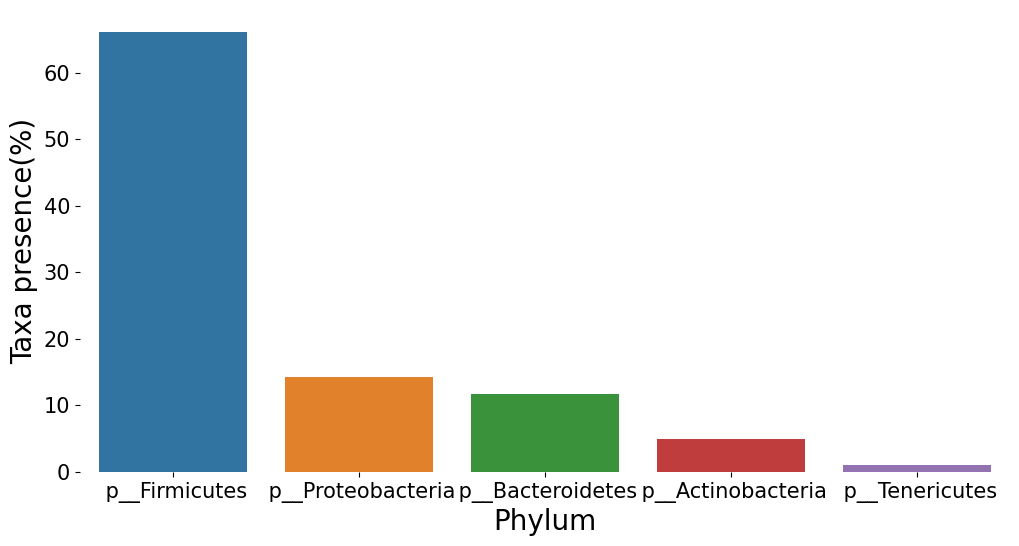

In [ ]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
 
plt.subplots(figsize=(12, 6)) 
# Create bars 
fig = sns.barplot(x=phylum_data['Phylum'][:5], y=phylum_data['Occurence %'][:5]) 
sns.despine(bottom = True, left = True) 
fig.set_xlabel("Phylum",fontsize=20) 
fig.tick_params(labelsize=15) 
fig.set_ylabel("Taxa presence(%)",fontsize=20) 
plt.savefig('phylum.pdf')

In [ ]:
clas = []
value = []
for val, cnt in otus_tax_s['class'].value_counts().iteritems():
     clas.append(val)
     value.append(cnt/otus_tax_s.shape[0]*100)

class_data = pd.DataFrame.from_dict({'Class': clas, 'Occurence':value}) 

<ipython-input-123-1cafa0714957>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for val, cnt in otus_tax_s['class'].value_counts().iteritems():


Text(0, 0.5, 'Taxa presence %')

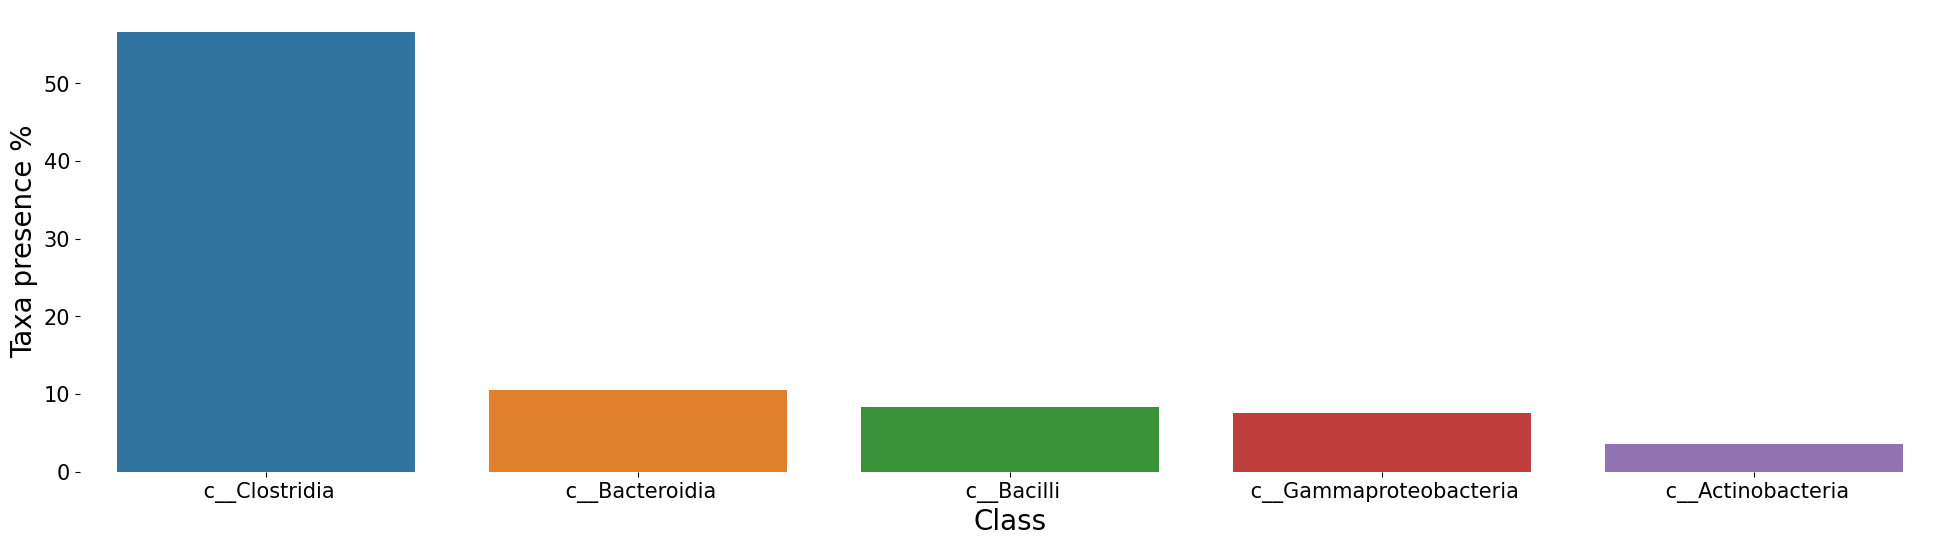

In [ ]:
# Print only top15 countries 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
 
plt.subplots(figsize=(24, 6)) 
# Create bars 
fig = sns.barplot(x=class_data['Class'][:5], y=class_data['Occurence'][:5]) 
sns.despine(bottom = True, left = True) 
fig.set_xlabel("Class",fontsize=20) 
fig.tick_params(labelsize=15) 
fig.set_ylabel("Taxa presence %",fontsize=20) 
#plt.savefig('animali.png')

In [ ]:
otus_t.set_index("id",inplace=True)

In [ ]:
total =  otus_t.sum()
total

10317.000001166.25853    34320.0
10317.000003100.69016    25450.0
10317.000004936.25853        5.0
10317.000010862.25853    35730.0
10317.000012018.56079    18325.0
                          ...   
10317.000109791.74729    20373.0
10317.000109807.76952    23913.0
10317.000110177.74729    28555.0
10317.000112912.76952     1238.0
10317.000113026.81168    24065.0
Length: 359, dtype: float64

## Separate groups analysis

In this section we are going to split the two groups using the 'refined sugar' column and analyze them 

Adding target column: Refined sugars

In [ ]:
otus_t.loc['refined_sugars'] = list(meta['refined_sugars'])

In [ ]:
otus_t

,10317.000001166.25853,10317.000003100.69016,10317.000004936.25853,10317.000010862.25853,10317.000012018.56079,10317.000013727.69016,10317.000014885.41931,10317.000017272.30606,10317.000020655.26478,10317.000022184.26478,...,10317.000108496.74729,10317.000108903.74729,10317.000108906.74729,10317.000109022.74729,10317.000109095.74729,10317.000109791.74729,10317.000109807.76952,10317.000110177.74729,10317.000112912.76952,10317.000113026.81168
id,,,,,,,,,,,,,,,,,,,,,
2941399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4425663,1.0,1.0,0.0,0.0,64.0,0.0,0.0,0.0,2.0,8.0,...,3.0,0.0,4.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0
353737,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
363646,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1090458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
325586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
otus_ref = otus_t.T

Lets add another column that will cointain the row sum (sum of features for each sample):

In [ ]:
otus_ref['id_sum']= total

In [ ]:
norm = otus_ref.iloc[:, :-2]

In [ ]:
norm = norm.apply(lambda x: x/otus_ref['id_sum'])

In [ ]:
norm['id_sum'] = otus_ref['id_sum']
norm['refined_sugars'] = otus_ref["refined_sugars"]

Now we are going to normalize the table dividing each cell for the corresponding id_sum, weighting the value of the feature in that sample for the total number of feature in each sample:

In [ ]:
norm

id,2941399,4425663,353737,363646,1090458,922239,845273,185021,293665,4453060,...,4324040,333726,199147,1808779,173916,435264,325586,4307347,id_sum,refined_sugars
10317.000001166.25853,0.0,0.000029,0.0,0.0,0.0,0.0,0.0,0.000029,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34320.0,No
10317.000003100.69016,0.0,0.000039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25450.0,No
10317.000004936.25853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,No
10317.000010862.25853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35730.0,No
10317.000012018.56079,0.0,0.003492,0.0,0.0,0.0,0.0,0.000055,0.0,0.0,0.000055,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18325.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10317.000109791.74729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20373.0,Yes
10317.000109807.76952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23913.0,Yes
10317.000110177.74729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00007,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28555.0,Yes
10317.000112912.76952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1238.0,Yes


In [ ]:
otus_yes = norm[norm['refined_sugars'] == 'Yes']
otus_yes = otus_yes.loc[otus_yes['id_sum'] > 5000]

In [ ]:
otus_yes.iloc[:,:-2]

id,2941399,4425663,353737,363646,1090458,922239,845273,185021,293665,4453060,...,213762,179905,4324040,333726,199147,1808779,173916,435264,325586,4307347
10317.000023139.25853,0.0,0.000197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000197,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000027811.25853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00164,0.000055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000031513.25853,0.0,0.000066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000033280.31503,0.0,0.00004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00004,0.000121,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000038261.33800,0.0,0.000296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10317.000109095.74729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000109791.74729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000109807.76952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000110177.74729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00007,0.0,0.0,...,0.0,0.000035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Mean and standard deviations of the two groups:

In [ ]:
mean_y = otus_yes.iloc[:,:-2].mean(axis=0)
sorted_series_y = mean_y.sort_values(ascending
                              = False)
sorted_series_y

id
4448331    0.193446
4468234    0.046197
4381553    0.024871
4449851    0.020122
4447072    0.019601
             ...   
1146158    0.000000
1046488    0.000000
4350042    0.000000
663885     0.000000
4307347    0.000000
Length: 6904, dtype: float64

In [ ]:
std_y = otus_yes.iloc[:,:-2].std(axis=0)
std_y.sort_values(ascending= False)

id
4448331    0.263809
1071450    0.083623
814442     0.070377
4454529    0.066385
4449851    0.062846
             ...   
1146158    0.000000
1046488    0.000000
4350042    0.000000
663885     0.000000
4307347    0.000000
Length: 6904, dtype: float64

In [ ]:
sorted_series_y = sorted_series_y.to_frame()

In [ ]:
otus_no = norm[norm['refined_sugars'] == 'No']
otus_no = otus_no.loc[otus_no['id_sum'] > 5000]

In [ ]:
otus_no

id,2941399,4425663,353737,363646,1090458,922239,845273,185021,293665,4453060,...,4324040,333726,199147,1808779,173916,435264,325586,4307347,id_sum,refined_sugars
10317.000001166.25853,0.0,0.000029,0.0,0.0,0.0,0.0,0.0,0.000029,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34320.0,No
10317.000003100.69016,0.0,0.000039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25450.0,No
10317.000010862.25853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35730.0,No
10317.000012018.56079,0.0,0.003492,0.0,0.0,0.0,0.0,0.000055,0.0,0.0,0.000055,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18325.0,No
10317.000013727.69016,0.0,0.0,0.000028,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35616.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10317.000065667.26478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23268.0,No
10317.000065673.25853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000065,0.0,0.0,...,0.000032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30793.0,No
10317.000065675.25853,0.0,0.001902,0.0,0.0,0.002161,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42577.0,No
10317.000065681.25853,0.0,0.000022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46270.0,No


In [ ]:
mean_no = otus_no.iloc[:,:-2].mean(axis=0)
sorted_series_n = mean_no.sort_values(ascending
                              = False)
sorted_series_n

id
4448331    0.133306
4468234    0.064582
4436552    0.040467
4481131    0.024162
4447072    0.023637
             ...   
147852     0.000000
137594     0.000000
6268       0.000000
340614     0.000000
4307347    0.000000
Length: 6904, dtype: float64

In [ ]:
std_n = otus_no.iloc[:,:-2].std(axis=0)
std_n.sort_values(ascending= False)

id
4448331    0.236638
4436552    0.117638
4468234    0.092338
4449851    0.062310
814442     0.056115
             ...   
147852     0.000000
137594     0.000000
6268       0.000000
340614     0.000000
4307347    0.000000
Length: 6904, dtype: float64

In [ ]:
sorted_series_n = sorted_series_n.to_frame()

## Phylum composition in the 2 groups

This section contains all the analysis at 'phylum' level of the sample

In [ ]:
phylum_sum = otus_tax_s.groupby("phylum").sum().T

<ipython-input-149-c8b0ee1e7017>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  phylum_sum = otus_tax_s.groupby("phylum").sum().T


In [ ]:
phylum_sum

phylum,p__Acidobacteria,p__Actinobacteria,p__Bacteroidetes,p__Chloroflexi,p__Crenarchaeota,p__Cyanobacteria,p__Deferribacteres,p__Euryarchaeota,p__Firmicutes,p__Fusobacteria,...,p__Planctomycetes,p__Proteobacteria,p__SR1,p__Spirochaetes,p__Synergistetes,p__TM7,p__Tenericutes,p__Verrucomicrobia,p__WPS-2,p__[Thermi]
10317.000001166.25853,0.0,627.0,102.0,0.0,0.0,3.0,0.0,0.0,31940.0,2.0,...,0.0,1640.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,2.0
10317.000003100.69016,0.0,78.0,7641.0,0.0,0.0,3.0,0.0,0.0,3765.0,0.0,...,1.0,13879.0,0.0,0.0,0.0,1.0,4.0,78.0,0.0,0.0
10317.000004936.25853,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000010862.25853,0.0,475.0,21745.0,0.0,0.0,0.0,0.0,1.0,12571.0,0.0,...,0.0,936.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
10317.000012018.56079,0.0,51.0,4761.0,0.0,0.0,1.0,0.0,0.0,8315.0,1.0,...,0.0,5195.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10317.000109791.74729,0.0,555.0,1157.0,0.0,0.0,0.0,0.0,0.0,18539.0,2.0,...,0.0,100.0,0.0,0.0,0.0,0.0,3.0,16.0,0.0,1.0
10317.000109807.76952,0.0,38.0,828.0,0.0,0.0,1.0,0.0,0.0,9766.0,0.0,...,0.0,13277.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
10317.000110177.74729,0.0,196.0,2807.0,0.0,0.0,0.0,0.0,5.0,24424.0,0.0,...,0.0,321.0,0.0,1.0,0.0,0.0,780.0,21.0,0.0,0.0
10317.000112912.76952,0.0,36.0,372.0,0.0,0.0,0.0,0.0,7.0,503.0,3.0,...,0.0,306.0,0.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0


In [ ]:
otus_ref.id_sum

10317.000001166.25853    34320.0
10317.000003100.69016    25450.0
10317.000004936.25853        5.0
10317.000010862.25853    35730.0
10317.000012018.56079    18325.0
                          ...   
10317.000109791.74729    20373.0
10317.000109807.76952    23913.0
10317.000110177.74729    28555.0
10317.000112912.76952     1238.0
10317.000113026.81168    24065.0
Name: id_sum, Length: 359, dtype: float64

In [ ]:
phylum_norm = phylum_sum.apply(lambda x: x/otus_ref.id_sum)

In [ ]:
phylum_norm.columns

Index([' p__Acidobacteria', ' p__Actinobacteria', ' p__Bacteroidetes',
       ' p__Chloroflexi', ' p__Crenarchaeota', ' p__Cyanobacteria',
       ' p__Deferribacteres', ' p__Euryarchaeota', ' p__Firmicutes',
       ' p__Fusobacteria', ' p__Gemmatimonadetes', ' p__Lentisphaerae',
       ' p__Nitrospirae', ' p__Planctomycetes', ' p__Proteobacteria',
       ' p__SR1', ' p__Spirochaetes', ' p__Synergistetes', ' p__TM7',
       ' p__Tenericutes', ' p__Verrucomicrobia', ' p__WPS-2', ' p__[Thermi]'],
      dtype='object', name='phylum')

In [ ]:
phylum_norm

phylum,p__Acidobacteria,p__Actinobacteria,p__Bacteroidetes,p__Chloroflexi,p__Crenarchaeota,p__Cyanobacteria,p__Deferribacteres,p__Euryarchaeota,p__Firmicutes,p__Fusobacteria,...,p__Planctomycetes,p__Proteobacteria,p__SR1,p__Spirochaetes,p__Synergistetes,p__TM7,p__Tenericutes,p__Verrucomicrobia,p__WPS-2,p__[Thermi]
10317.000001166.25853,0.0,0.018269,0.002972,0.0,0.0,0.000087,0.0,0.000000,0.930653,0.000058,...,0.000000,0.047786,0.0,0.000000,0.000000,0.000029,0.000058,0.000029,0.0,0.000058
10317.000003100.69016,0.0,0.003065,0.300236,0.0,0.0,0.000118,0.0,0.000000,0.147937,0.000000,...,0.000039,0.545344,0.0,0.000000,0.000000,0.000039,0.000157,0.003065,0.0,0.000000
10317.000004936.25853,0.0,0.000000,0.600000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.400000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
10317.000010862.25853,0.0,0.013294,0.608592,0.0,0.0,0.000000,0.0,0.000028,0.351833,0.000000,...,0.000000,0.026196,0.0,0.000000,0.000000,0.000000,0.000000,0.000056,0.0,0.000000
10317.000012018.56079,0.0,0.002783,0.259809,0.0,0.0,0.000055,0.0,0.000000,0.453752,0.000055,...,0.000000,0.283492,0.0,0.000000,0.000000,0.000000,0.000055,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10317.000109791.74729,0.0,0.027242,0.056791,0.0,0.0,0.000000,0.0,0.000000,0.909979,0.000098,...,0.000000,0.004908,0.0,0.000000,0.000000,0.000000,0.000147,0.000785,0.0,0.000049
10317.000109807.76952,0.0,0.001589,0.034626,0.0,0.0,0.000042,0.0,0.000000,0.408397,0.000000,...,0.000000,0.555221,0.0,0.000000,0.000000,0.000000,0.000084,0.000000,0.0,0.000000
10317.000110177.74729,0.0,0.006864,0.098302,0.0,0.0,0.000000,0.0,0.000175,0.855332,0.000000,...,0.000000,0.011241,0.0,0.000035,0.000000,0.000000,0.027316,0.000735,0.0,0.000000
10317.000112912.76952,0.0,0.029079,0.300485,0.0,0.0,0.000000,0.0,0.005654,0.406300,0.002423,...,0.000000,0.247173,0.0,0.000000,0.000808,0.000000,0.008078,0.000000,0.0,0.000000


In [ ]:
phylum_norm.mean().sort_values()

phylum
 p__Gemmatimonadetes    8.467770e-08
 p__Crenarchaeota       9.662869e-08
 p__Planctomycetes      1.094505e-07
 p__Nitrospirae         1.262757e-07
 p__Acidobacteria       3.751049e-07
 p__WPS-2               3.949222e-07
 p__SR1                 4.418751e-07
 p__Chloroflexi         4.873252e-07
 p__Deferribacteres     7.635477e-07
 p__TM7                 9.589129e-07
 p__Spirochaetes        6.793912e-06
 p__Synergistetes       7.497753e-05
 p__Lentisphaerae       1.124741e-04
 p__Euryarchaeota       2.157322e-04
 p__[Thermi]            3.207688e-04
 p__Fusobacteria        4.333133e-04
 p__Cyanobacteria       1.182693e-03
 p__Tenericutes         4.614087e-03
 p__Actinobacteria      1.116115e-02
 p__Verrucomicrobia     1.346508e-02
 p__Proteobacteria      2.771746e-01
 p__Bacteroidetes       3.106210e-01
 p__Firmicutes          3.806134e-01
dtype: float64

In [ ]:
list_p = [" p__Firmicutes"," p__Proteobacteria"," p__Bacteroidetes"]

In [ ]:
phylum_f = phylum_norm[[" p__Firmicutes"," p__Proteobacteria"," p__Bacteroidetes"]].reset_index()

In [ ]:
phylum_f["sex"] = meta["sex"]
phylum_f["refined_sugars"] = meta["refined_sugars"]
phylum_f["age_cat"] = meta["age_cat"]
phylum_f["n_bact"] = otus_ref.id_sum.reset_index(drop=True)

In [ ]:
phylum_f

phylum,index,p__Firmicutes,p__Proteobacteria,p__Bacteroidetes,sex,refined_sugars,age_cat,n_bact
0,10317.000001166.25853,0.930653,0.047786,0.002972,female,No,40s,34320.0
1,10317.000003100.69016,0.147937,0.545344,0.300236,female,No,40s,25450.0
2,10317.000004936.25853,0.000000,0.400000,0.600000,male,No,50s,5.0
3,10317.000010862.25853,0.351833,0.026196,0.608592,male,No,20s,35730.0
4,10317.000012018.56079,0.453752,0.283492,0.259809,female,No,50s,18325.0
...,...,...,...,...,...,...,...,...
354,10317.000109791.74729,0.909979,0.004908,0.056791,male,Yes,20s,20373.0
355,10317.000109807.76952,0.408397,0.555221,0.034626,female,Yes,40s,23913.0
356,10317.000110177.74729,0.855332,0.011241,0.098302,male,Yes,30s,28555.0
357,10317.000112912.76952,0.406300,0.247173,0.300485,female,Yes,50s,1238.0


In [ ]:
phylum_mean = phylum_f.groupby(["sex","age_cat","refined_sugars"]).mean().reset_index()

<ipython-input-162-cb99f548226b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  phylum_mean = phylum_f.groupby(["sex","age_cat","refined_sugars"]).mean().reset_index()


In [ ]:
phylum_sd = phylum_f.groupby(["sex","age_cat","refined_sugars"]).std().reset_index()

<ipython-input-163-28db28bd88b0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  phylum_sd = phylum_f.groupby(["sex","age_cat","refined_sugars"]).std().reset_index()


In [ ]:
phylum_tot = phylum_mean.iloc[:,0:3]

In [ ]:
phylum_tot["firmicutes_mean"] = phylum_mean[" p__Firmicutes"]
phylum_tot["proteobacteria_mean"] = phylum_mean[" p__Proteobacteria"]
phylum_tot["bacteroidetes_mean"] = phylum_mean[" p__Bacteroidetes"]

phylum_tot["firmicutes_sd"] = phylum_sd[" p__Firmicutes"]
phylum_tot["proteobacteria_sd"] = phylum_sd[" p__Proteobacteria"]
phylum_tot["bacteroidetes_sd"] = phylum_sd[" p__Bacteroidetes"]

In [ ]:
phylum_tot

phylum,sex,age_cat,refined_sugars,firmicutes_mean,proteobacteria_mean,bacteroidetes_mean,firmicutes_sd,proteobacteria_sd,bacteroidetes_sd
0,female,20s,No,0.459335,0.146152,0.359649,0.233089,0.228548,0.237955
1,female,20s,Yes,0.548756,0.016681,0.365942,0.145776,0.010205,0.159735
2,female,30s,No,0.476616,0.176752,0.308277,0.231317,0.278079,0.161554
3,female,30s,Yes,0.430173,0.219800,0.313740,0.250051,0.298455,0.210858
4,female,40s,No,0.373014,0.373995,0.219462,0.265964,0.343717,0.194296
5,female,40s,Yes,0.424007,0.365010,0.179179,0.320772,0.361163,0.145974
6,female,50s,No,0.271416,0.323956,0.384895,0.233771,0.405704,0.324585
7,female,50s,Yes,0.357306,0.389457,0.214955,0.252058,0.340052,0.176648
8,female,60s,No,0.359548,0.214792,0.374773,0.224259,0.280103,0.221704
9,female,60s,Yes,0.276305,0.418428,0.282558,0.168744,0.275018,0.200803


In [ ]:
phylum_tot.to_csv("/content/drive/MyDrive/Bioscienze/Progetto/Data/phylum_tot.csv")

In [548]:
otus_tax_bacte = otus_tax_s.loc[otus_tax_s["family"] == " f__Porphyromonadaceae"]

In [549]:
class_sum = otus_tax_bacte.groupby("genus").sum().T

<ipython-input-549-87c3d5965f0d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class_sum = otus_tax_bacte.groupby("genus").sum().T


In [550]:
class_sum

genus,g__,g__Dysgonomonas,g__Paludibacter,g__Parabacteroides,g__Porphyromonas,g__Tannerella
10317.000001166.25853,0,0,0,4,0,0
10317.000003100.69016,0,0,0,1,4,0
10317.000004936.25853,0,0,0,0,0,0
10317.000010862.25853,0,0,0,1,4,0
10317.000012018.56079,0,0,0,3,0,0
...,...,...,...,...,...,...
10317.000109791.74729,0,0,0,4,2,0
10317.000109807.76952,0,0,0,2,0,0
10317.000110177.74729,0,0,0,6,3,0
10317.000112912.76952,0,0,0,4,1,0


In [551]:
tot_class = class_sum.sum(axis=1)

In [552]:
class_norm = class_sum.apply(lambda x: x/tot_class)

In [553]:
class_norm

genus,g__,g__Dysgonomonas,g__Paludibacter,g__Parabacteroides,g__Porphyromonas,g__Tannerella
10317.000001166.25853,0.0,0.0,0.0,1.000000,0.000000,0.0
10317.000003100.69016,0.0,0.0,0.0,0.200000,0.800000,0.0
10317.000004936.25853,NaN,NaN,NaN,NaN,NaN,NaN
10317.000010862.25853,0.0,0.0,0.0,0.200000,0.800000,0.0
10317.000012018.56079,0.0,0.0,0.0,1.000000,0.000000,0.0
...,...,...,...,...,...,...
10317.000109791.74729,0.0,0.0,0.0,0.666667,0.333333,0.0
10317.000109807.76952,0.0,0.0,0.0,1.000000,0.000000,0.0
10317.000110177.74729,0.0,0.0,0.0,0.666667,0.333333,0.0
10317.000112912.76952,0.0,0.0,0.0,0.800000,0.200000,0.0


In [554]:
class_norm = class_norm.reset_index()
class_norm["sex"] = meta["sex"]
class_norm["refined_sugars"] = meta["refined_sugars"]
class_norm["age_cat"] = meta["age_cat"]
class_norm["n_bact"] = otus_ref.id_sum.reset_index(drop=True)

In [555]:
class_norm

genus,index,g__,g__Dysgonomonas,g__Paludibacter,g__Parabacteroides,g__Porphyromonas,g__Tannerella,sex,refined_sugars,age_cat,n_bact
0,10317.000001166.25853,0.0,0.0,0.0,1.000000,0.000000,0.0,female,No,40s,34320.0
1,10317.000003100.69016,0.0,0.0,0.0,0.200000,0.800000,0.0,female,No,40s,25450.0
2,10317.000004936.25853,NaN,NaN,NaN,NaN,NaN,NaN,male,No,50s,5.0
3,10317.000010862.25853,0.0,0.0,0.0,0.200000,0.800000,0.0,male,No,20s,35730.0
4,10317.000012018.56079,0.0,0.0,0.0,1.000000,0.000000,0.0,female,No,50s,18325.0
...,...,...,...,...,...,...,...,...,...,...,...
354,10317.000109791.74729,0.0,0.0,0.0,0.666667,0.333333,0.0,male,Yes,20s,20373.0
355,10317.000109807.76952,0.0,0.0,0.0,1.000000,0.000000,0.0,female,Yes,40s,23913.0
356,10317.000110177.74729,0.0,0.0,0.0,0.666667,0.333333,0.0,male,Yes,30s,28555.0
357,10317.000112912.76952,0.0,0.0,0.0,0.800000,0.200000,0.0,female,Yes,50s,1238.0


In [556]:
class_mean = class_norm.groupby(["refined_sugars"]).mean().reset_index()

<ipython-input-556-8923fb0a97e2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class_mean = class_norm.groupby(["refined_sugars"]).mean().reset_index()


In [557]:
class_mean

genus,refined_sugars,g__,g__Dysgonomonas,g__Paludibacter,g__Parabacteroides,g__Porphyromonas,g__Tannerella,n_bact
0,No,0.002451,0.005882,0.000452,0.817748,0.172561,0.000905,30175.767045
1,Yes,0.000639,0.022105,0.000000,0.841945,0.134789,0.000522,43886.377049
